## 付録1 --- APLpy 

入門編でAPLpyまでやるのはやりすぎかもしれませんね。  
しかし、使い方は簡単ですので紹介しておきます。

FITSデータにWCSが入っていれば、APLpyを使って簡単に(X, Y)ではなく(RA,DEC)で図を作成することができます。

https://aplpy.github.io が公式ページです。 
ここのDocumentationのリンクに詳細な説明があります。http://aplpy.readthedocs.io/en/stable/

下のリンクからサンプルデータをダウンロードしてください。  
http://aplpy.github.com/downloads/tutorial.tar.gz  
tar + gzを展開するとtutorialというディレクトリができますので、適当なところに置いてください。
(例えば下のように、この講習会のディレクトリにaplpyというディレクトリを作ってその下。) 


In [1]:
cd aplpy/tutorial/

/Users/yas.nakajima/adc2017python/aplpy/tutorial


In [2]:
ls

data/        fits/        graphics/    myaplpy.png


In [3]:
%matplotlib inline

APLpyは内部でmatplotlibを使っています。上のように宣言しておくとnotebook内に図が表示されます。

In [4]:
import aplpy

In [5]:
import numpy as np # あとで使います

### FITS画像の表示

fitsディレクトリの中のサンプルFITSデータのひとつを表示させます。  
wcsが入っているので赤経・赤緯が軸に表示されます。  
デフォルトでは表示のグレイスケールが自動で設定されます。

INFO: Auto-setting vmin to  3.554e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.798e+03 [aplpy.core]


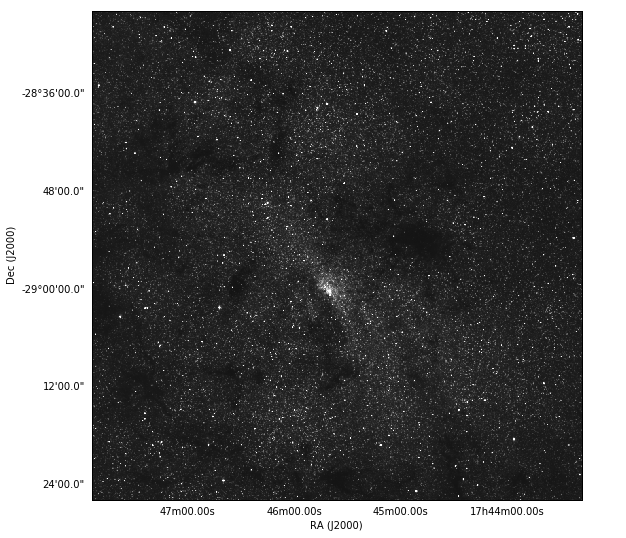

In [6]:
figure = aplpy.FITSFigure('./fits/2MASS_k.fits')
figure.show_grayscale()

表示を少しカスタマイズします。  
- aplpy.FITSFigure()の引数 figsize=()で表示サイズを変更
- .show_grayscale()メソッドの引数 vmin=, vmax= で表示のグレイスケールの範囲を設定

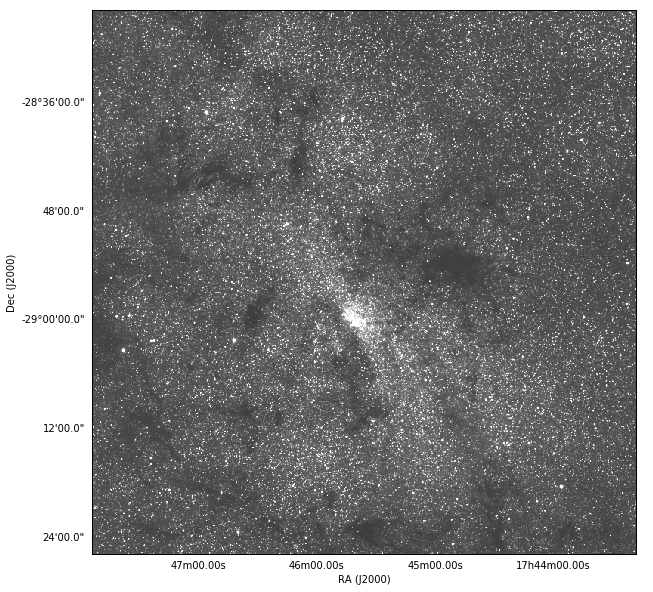

In [7]:
figure = aplpy.FITSFigure('./fits/2MASS_k.fits', figsize=(10, 10))
figure.show_grayscale(vmin=300, vmax=1000)

暗い星まで表示され、暗黒星雲が見やすくなりました。  

### 星をプロット

次に星のリストを読み取り、この画像の上にプロットします。  
'data/yso_wcs_only.txt' には赤経・赤緯が2列で記されています。  (単位はdegree)   

np.loadtxt() で読み取ります。
読み取ったnumpy ndarrayの1列目をra, 2列目をdecとして分けておきます。(ここでは、わかりやすさのため)  

In [8]:
data = np.loadtxt('data/yso_wcs_only.txt')
ra, dec = data[:, 0], data[:, 1]

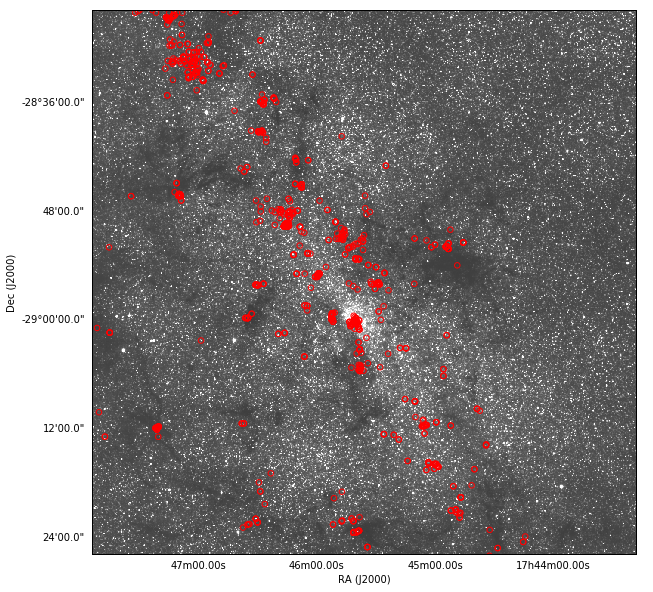

In [9]:
figure = aplpy.FITSFigure('./fits/2MASS_k.fits', figsize=(10, 10))
figure.show_markers(ra, dec)
figure.show_grayscale(vmin=300, vmax=1000)

pngなどのファイルに書き出すこともできます。

In [10]:
figure.savefig('myaplpy.png')